# Wavelength Loss dependence for N3 with PML



In [12]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from scipy.optimize import newton

# Initialize

In [2]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [3]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ts = [15*2.7183333333333333e-6, 10e-6,
      15*2.7183333333333333e-6, 10e-6, 15*2.7183333333333333e-6]

mats = ['air', 'glass', 'air', 'glass', 'air']
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x:n_glass, lambda x:n_air]
maxhs = [100,100,100,100,100]
scale=15e-6


A = BraggExact(ts=ts, ns=ns, mats=mats, maxhs=maxhs, wl=wls[0], scale=scale,
              no_mesh=True)

Boundary names not provided, using default names.


# First get exact values

In [4]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, ns=ns, mats=mats, maxhs=maxhs, wl=wl, scale=scale,
                  no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99995 * k_low) +0*1j
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess = 1/.999999 * guess.real + imag * 1j
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag  # set current imaginary part as guess for next one
                flag=False
        except RuntimeError:
            guess = .999999 * guess.real + 1j * imag
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (67.33280465337657-1.3842981420896257e-08j) . Residual of determinant:  3.791612986434471e-07 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.23672187801269-1.0423926755687613e-08j) . Residual of determinant:  6.075810613451644e-08 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.14091458236472-8.142178914683323e-09j) . Residual of determinant:  6.47189343966229e-07 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (67.04538117374484-6.567307095713462e-09j) . Residual of 

Scaled beta:  (64.38843551803937-1.1865395681504448e-07j) . Residual of determinant:  7.75951676462885e-09 


     --------------------  34/301: wavelength: 1.466e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (64.30053212519469-2.1762819065930376e-07j) . Residual of determinant:  3.4601090328675643e-09 


     --------------------  35/301: wavelength: 1.468e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (64.2128513306851-4.4959715626176003e-07j) . Residual of determinant:  8.987422051451739e-10 


     --------------------  36/301: wavelength: 1.47e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (64.12537959899693-1.099426403004932e-06j) . Residual of determinant:  5.485111409697684e-10 


     --------------------  37/301: wavelength: 1.4719999999999998e-06  ---------------

scaling guess: 1
Scaled beta:  (61.69125367602553-3.886362234799162e-09j) . Residual of determinant:  4.124162605349714e-07 


     --------------------  66/301: wavelength: 1.53e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.61058866534158-3.831458183183497e-09j) . Residual of determinant:  5.068093980369207e-07 


     --------------------  67/301: wavelength: 1.532e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.5301342670724-3.824392577781876e-09j) . Residual of determinant:  1.5302916103770672e-07 


     --------------------  68/301: wavelength: 1.5339999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.44988961877657-3.86432970583017e-09j) . Residual of determinant:  1.3997080225239787e-07 


     --------------------  69/301: wavelength: 1.536e-06  --------------------     

Boundary names not provided, using defaul

scaling guess: 1
Scaled beta:  (59.13812711446469-6.318357424103287e-05j) . Residual of determinant:  2.9900619630496524e-11 


     --------------------  99/301: wavelength: 1.5959999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (59.06330220819722-1.4562056130373861e-05j) . Residual of determinant:  3.132613943932433e-11 


     --------------------  100/301: wavelength: 1.598e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (58.98904625454784-4.516451845227574e-06j) . Residual of determinant:  4.81746925169272e-10 


     --------------------  101/301: wavelength: 1.6e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (58.915118075727946-1.7849848339197577e-06j) . Residual of determinant:  2.543809744467395e-10 


     --------------------  102/301: wavelength: 1.6019999999999999e-06  ----------------

Scaled beta:  (56.85312505332246-5.730415451683282e-09j) . Residual of determinant:  2.5970174898356702e-09 


     --------------------  131/301: wavelength: 1.6599999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (56.78460440267264-5.869415610740792e-09j) . Residual of determinant:  2.7762058786787137e-07 


     --------------------  132/301: wavelength: 1.662e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (56.71624854887357-6.065739281069866e-09j) . Residual of determinant:  6.357425995834209e-08 


     --------------------  133/301: wavelength: 1.6639999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (56.64805686776389-6.32523892767661e-09j) . Residual of determinant:  1.8938331546341567e-07 


     --------------------  134/301: wavelength: 1.6659999999999998e-06  --------------------     

Boundary names not provid

scaling guess: 2
Scaled beta:  (54.744560141388504-0.0004015065414058425j) . Residual of determinant:  4.962280809916179e-12 


     --------------------  163/301: wavelength: 1.724e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
Scaled beta:  (54.67823627177456-0.0030313370067026283j) . Residual of determinant:  6.874295960598722e-16 


     --------------------  164/301: wavelength: 1.7259999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (54.61548340041819-0.00016540334650780298j) . Residual of determinant:  7.37809050108172e-12 


     -----------

Scaled beta:  (52.77757142258091-9.435480001636637e-09j) . Residual of determinant:  1.292407812843045e-07 


     --------------------  195/301: wavelength: 1.7879999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.718512998281454-9.117225852568928e-09j) . Residual of determinant:  9.354654987589073e-08 


     --------------------  196/301: wavelength: 1.7899999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.659586627555136-8.871501094961072e-09j) . Residual of determinant:  3.580393689232406e-08 


     --------------------  197/301: wavelength: 1.792e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.60079184408022-8.691576929914234e-09j) . Residual of determinant:  6.025969751709422e-08 


     --------------------  198/301: wavelength: 1.7939999999999999e-06  --------------------     

Boundary names not provid

Scaled beta:  (50.95094215833342-1.1083990868422592e-07j) . Residual of determinant:  1.2627357360400044e-08 


     --------------------  227/301: wavelength: 1.8519999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (50.895880581482544-1.419065652167376e-07j) . Residual of determinant:  2.4685655331053184e-09 


     --------------------  228/301: wavelength: 1.854e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (50.8409348470922-1.8549883763304794e-07j) . Residual of determinant:  9.68520459533327e-09 


     --------------------  229/301: wavelength: 1.8559999999999999e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (50.786103888366085-2.4826494290180687e-07j) . Residual of determinant:  4.821853515048378e-09 


     --------------------  230/301: wavelength: 1.8579999999999998e-06

Scaled beta:  (49.24723432180586-1.1172487541322109e-07j) . Residual of determinant:  2.393019348480609e-09 


     --------------------  259/301: wavelength: 1.916e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (49.19579301318984-9.225674236645752e-08j) . Residual of determinant:  1.5523297826030767e-08 


     --------------------  260/301: wavelength: 1.918e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (49.14446068896397-7.726990574104088e-08j) . Residual of determinant:  1.5197735713832887e-08 


     --------------------  261/301: wavelength: 1.92e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (49.093236736600694-6.55604142810046e-08j) . Residual of determinant:  1.6872003732355646e-08 


     --------------------  262/301: wavelength: 1.922e-06  --------------------     

Boundary names not provided, using default nam

Scaled beta:  (47.65299548689146-1.4131929892335159e-08j) . Residual of determinant:  8.06795717370372e-08 


     --------------------  291/301: wavelength: 1.9799999999999997e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (47.604838143210856-1.4479267513324167e-08j) . Residual of determinant:  4.622172093223054e-08 


     --------------------  292/301: wavelength: 1.982e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (47.55677788361644-1.4901173813688252e-08j) . Residual of determinant:  1.2534005651155385e-07 


     --------------------  293/301: wavelength: 1.984e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (47.5088143990848-1.540402857073688e-08j) . Residual of determinant:  2.7886952588941204e-10 


     --------------------  294/301: wavelength: 1.9859999999999997e-06  --------------------     

Boundary names not provided, using d

In [6]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 10e-6

Ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
Ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

In [13]:
np.save('betas1', betas1)

In [4]:
betas1 = np.load('betas1.npy')

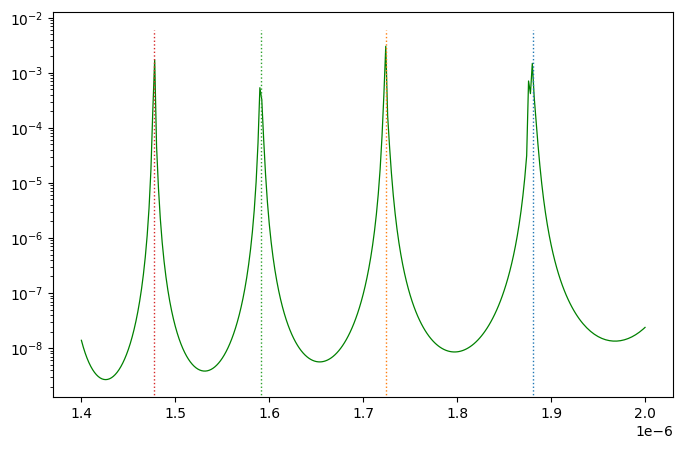

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(8,5))
ax = plt.gca()

ax.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
ym,yM = ax.get_ylim()
for l in Ls:
    ax.plot([l,l], [0, yM],  linewidth=1, linestyle=':')

# Now do it with PML for varying values of alpha

In [8]:
ts2 = [15*2.7183333333333333e-6, 10e-6, 15*2.7183333333333333e-6,
      10e-6, 30e-6, 30e-6]
rhos =[sum(ts[:i]) for i in range(1, len(ts2)+1)]

ns2 = [lambda x: n_air, lambda x: n_glass, lambda x: n_air,
      lambda x: n_glass, lambda x: n_air, lambda x: n_air]
mats2 = ['core', 'glass', 'air', 'glass', 'air', 'Outer']
maxhs2 = [.2, .01, .1, .007, .04, .03]
scale = 15e-6


In [13]:
betas2 = np.zeros_like(wls, dtype=complex)

outer = 'pcb'
Ktype = 'kappa'
nu = 1
alpha = .01
pml = {'alpha':alpha, 'R0':rhos[-2]}


In [14]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts2, ns=ns2, mats=mats2, maxhs=maxhs2, wl=wl, scale=scale, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = betas1[i]
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer, Ktype, pml), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess = 1/.999999 * guess.real + imag * 1j
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer, Ktype, pml)), '\n\n' )
                imag = beta.imag  # set current imaginary part as guess for next one
                flag=False
        except RuntimeError:
            guess = .999999 * guess.real + 1j * imag
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.3328046536696-2.8218163515794496e-10j) . Residual of determinant:  2.1715959772039837e-08 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.23672187826024-2.1136091507034305e-10j) . Residual of determinant:  2.727784456188646e-08 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.14091458257602-1.6435560510405532e-10j) . Residual of determinant:  5.935551880491328e-08 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.04538117392786-1.3205286291073527e-10j) . Residual of determinant:  3.158313645782154e-08 


     ----

Scaled beta:  (63.86340000391973-3.2217731071514937e-06j) . Residual of determinant:  6.040845407905239e-13 


     --------------------  40/301: wavelength: 1.4779999999999999e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (63.77974986999264-1.0206999158340514e-05j) . Residual of determinant:  3.4653760126486627e-13 


     --------------------  41/301: wavelength: 1.48e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (63.69388311108741-8.550816693042705e-06j) . Residual of determinant:  2.020481136710476e-12 


     --------------------  42/301: wavelength: 1.482e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (63.60731559379452-3.014849867093463e-07j) . Residual of determinant:  7.637955375039952e-12 


     --------------------  43/301: wavelength: 1.484e-06  --------------------     

Boundary names not pr

Scaled beta:  (60.89397840074561-1.1366067525280697e-10j) . Residual of determinant:  8.89131107400167e-08 


     --------------------  76/301: wavelength: 1.55e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (60.815381069100546-1.2691309081167293e-10j) . Residual of determinant:  5.580377635867257e-08 


     --------------------  77/301: wavelength: 1.552e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (60.73698581128779-1.4377664890305747e-10j) . Residual of determinant:  9.247621384782803e-08 


     --------------------  78/301: wavelength: 1.5539999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (60.65879175576951-1.6538450758646172e-10j) . Residual of determinant:  1.3745314765001655e-08 


     --------------------  79/301: wavelength: 1.556e-06  --------------------     

Boundary names not provided, using default names.
Sca

Scaled beta:  (58.2591465184337-6.771987810014721e-10j) . Residual of determinant:  1.509958393624699e-09 


     --------------------  111/301: wavelength: 1.62e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (58.18719013022044-5.360416945647909e-10j) . Residual of determinant:  1.0015059382740172e-08 


     --------------------  112/301: wavelength: 1.6219999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (58.115412779326405-4.343303598490661e-10j) . Residual of determinant:  2.343846509315748e-08 


     --------------------  113/301: wavelength: 1.6239999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (58.04381349471428-3.59332588296629e-10j) . Residual of determinant:  1.2677315628944171e-08 


     --------------------  114/301: wavelength: 1.626e-06  --------------------     

Boundary names not provided, using defau

scaling guess: 2
Scaled beta:  (56.041616558248-2.736821776594545e-10j) . Residual of determinant:  6.781660318734607e-09 


     --------------------  143/301: wavelength: 1.6839999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (55.97503214680835-3.15977950933574e-10j) . Residual of determinant:  6.3103968792732095e-09 


     --------------------  144/301: wavelength: 1.6859999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (55.9086049139132-3.6966872214700297e-10j) . Residual of determinant:  2.74219562518658e-08 


     --------------------  145/301: wavelength: 1.6879999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (55.842334165472096-4.3866314051826204e-10j) . Residual of determinant:  4.128410758501943e-09 


     --------------------  146/301: wavelength: 1.69e-06  --------------------     

Boundary nam

scaling guess: 1
scaling guess: 2
Scaled beta:  (53.98726355142345-3.4877944846257686e-09j) . Residual of determinant:  1.878536652263635e-09 


     --------------------  175/301: wavelength: 1.7479999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (53.92544901071274-2.547597018542172e-09j) . Residual of determinant:  1.0212171491900963e-09 


     --------------------  176/301: wavelength: 1.7499999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (53.863779665022065-1.919472800004132e-09j) . Residual of determinant:  5.855526208873248e-09 


     --------------------  177/301: wavelength: 1.752e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (53.80225416061077-1.485406274363973e-09j) . Residual of determinant:  1.2813024532767147e-08 


     --------------------  178/301: wavelength: 1.7539999999999999e-06 

scaling guess: 1
scaling guess: 2
Scaled beta:  (52.135115759673624-1.8192752518975334e-10j) . Residual of determinant:  2.2024906870944896e-08 


     --------------------  206/301: wavelength: 1.8099999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.07748474688354-1.8864958182148002e-10j) . Residual of determinant:  4.202459000624897e-08 


     --------------------  207/301: wavelength: 1.8119999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (52.019980798438326-1.968936795945114e-10j) . Residual of determinant:  4.251681636577814e-08 


     --------------------  208/301: wavelength: 1.814e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (51.96260346967128-2.068525833573486e-10j) . Residual of determinant:  2.210659823507222e-08 


     --------------------  209/301: wavelength: 1.8159999999999999e-06

scaling guess: 1
Scaled beta:  (50.29726248332225-5.359034903276898e-07j) . Residual of determinant:  1.3394225680836101e-12 


     --------------------  239/301: wavelength: 1.876e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (50.23405868098982-1.3735332733303224e-05j) . Residual of determinant:  1.8447802947158303e-13 


     --------------------  240/301: wavelength: 1.8779999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (50.188850150760324-6.375165357102415e-06j) . Residual of determinant:  1.1658499838782693e-13 


     --------------------  241/301: wavelength: 1.8799999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (50.14372175823517-4.8118507232370165e-06j) . Residual of determinant:  1.055336005395331e-12 


     --------------------  242/301: wavelength: 1.882e-06  --------------------     



Scaled beta:  (48.58685066502435-4.346863342033044e-10j) . Residual of determinant:  1.2728901486853192e-09 


     --------------------  272/301: wavelength: 1.9419999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (48.536788243131795-4.0467109283596015e-10j) . Residual of determinant:  1.5844252685088325e-08 


     --------------------  273/301: wavelength: 1.944e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (48.48682907899233-3.7908544062990976e-10j) . Residual of determinant:  3.925899723990842e-09 


     --------------------  274/301: wavelength: 1.9459999999999997e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (48.436972821427524-3.5725082685701726e-10j) . Residual of determinant:  1.6974876434482753e-08 


     --------------------  275/301: wavelength: 1.948e-06  --------

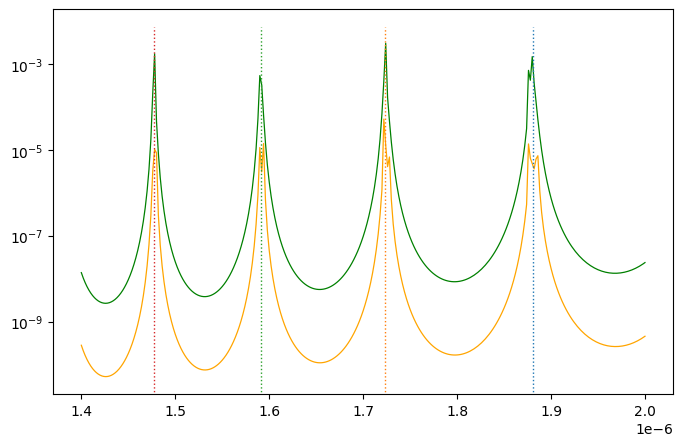

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(8,5))
ax = plt.gca()

ax.plot(wls, -betas1.imag, color='green', linewidth=.9)
ax.plot(wls, -betas2.imag, color='orange', linewidth=.9)

plt.yscale('log')
ym,yM = ax.get_ylim()
for l in Ls:
    ax.plot([l,l], [0, yM],  linewidth=1, linestyle=':')

# No ripples in this one

That seems to happen only when there is high index material to the boundary.